<a href="https://colab.research.google.com/github/carloslizarragac/FisicaComputacional1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline


In [ ]:
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Actividad1/Guaymas26292.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   17879 non-null  datetime64[ns]
 1   Precip  17847 non-null  float64       
 2   Evap    5731 non-null   float64       
 3   Tmax    17823 non-null  float64       
 4   Tmin    17828 non-null  float64       
 5   Año     17879 non-null  int64         
 6   Mes     17879 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 977.9 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1967-02-01     0.0   NaN  20.0   8.0  1967    2
1 1967-02-02     0.0   NaN  21.0   9.0  1967    2
2 1967-02-03     0.0   NaN  26.0   8.0  1967    2
3 1967-02-04     0.0   NaN  25.0   7.0  1967    2
4 1967-02-05     0.0   NaN  23.0   7.0  1967    2


# Análisis Exploratorio de Datos 
(EDA: Exploratory Data Analysis)

Iniciaremos una colección de funciones para realizar los que se llama **Análisis Exploratorio de Datos**. 

El EDA, como su nombre lo indica, nos concentramos en investigar todo lo relacionado con la forma y contenido del DatFrame.

Entre algunas las características en las nos centramos por ejemplo son:

*   Estructuras/patrones en los datos
*   Número de datos faltantes
*   Detección de datos anómalos y valores extremos
*   Extraer y seleccionar variables importantes
*   Probar alguna teoría de comportamiento de los datos

Aplicamos una serie de funciones al DatFrame para caracterizarlo. Ya hemos utilizado algunas de ellas en la Actividad anterior, y agregaremos un conjunto adicional de ellas.


**Descripción general de un DataFrame**

Lista de funciones a aplicar: 


1.   df.shape : Forma y dimensiones de df.
2.   df.types : Tipo de datos de las columnas (numéricas o categóricas)
3.   df.head(), df.tail(), df.sample(5)  : Despliege de un número de renglones, para ver la estructura de df, nombres de columnas o si los datos tienen sentido a lo esperado. 
4.   df.info() : Proporciona información general de la estructura y componentes de df  
5.   df.describe()  :  Descripción estadística de las variables numéricas. 
6.   df.describe(include='object')   : Descripción estadística de las variables categóricas. 
7.   df.isnull().sum()  :   Suma de valores faltantes.

**Actividad 1.** Por favor, sintetiza las características del conjunto de datos que estas analizando.


**Visualización de datos.** 

Dentro de las acciones que requerimos realizar para comprender un conjunto de datos es visualizarlos con ayuda de las bibliotecas de Pyton: Matplotlib, Seaborn y otras. 

Se pueden visualizar las características de variables numéricas mediante:

*   Histogramas
*   Distribuciones de Probabilidad 
*   Gráficas de caja (BoxPlots)
*   



**Uso de la biblioteca Matplotlib**

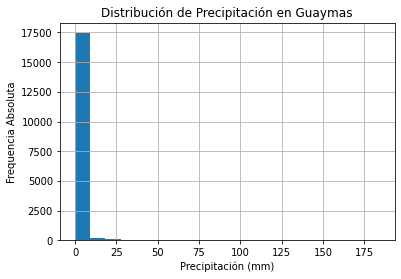

In [ ]:
# Elaboración de Histogramas
# Utilizamos Matplotlib.Pyplot, abreviado como plt 
# NOTA: Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable

plt.hist(df_meteo.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Guaymas')
plt.grid()
plt.show()


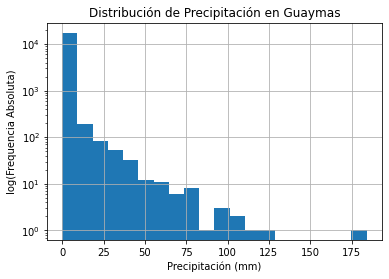

In [ ]:
# Repetimos la gráfica utilizando escala logarítmica en el Eje y para mejor visualización
plt.hist(df_meteo.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Guaymas')
plt.grid()
plt.show()


**Uso de la biblioteca Seaborn**

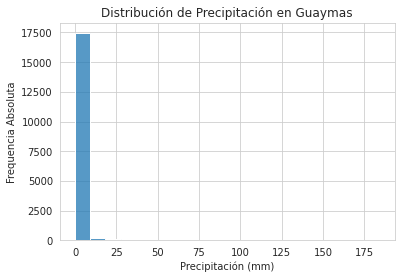

In [ ]:
# Misma gráfica utilizando la biblioteca Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Guaymas')
sns.histplot(data=df_meteo, x='Precip', bins=20);


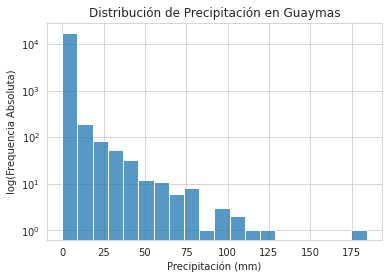

In [ ]:
# Repetimos la gráfica utilizando escala logarítmica sólo en el eje y
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Guaymas')
sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));


**Histogramas de las Temperaturas Máximas y Mínimas.**

**Actividad 2.** Por favor realiza las gráficas similares de histograma de las variables de Temperatura de la estación que estas analizando. 

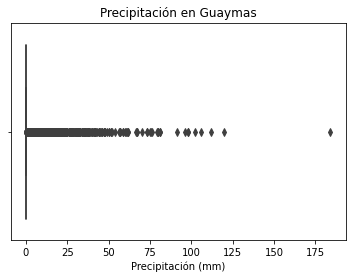

In [ ]:
# (Pendiente)
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.boxplot(x=df_meteo.Precip, data=df_meteo, orient='h').set(xlabel='Precipitación (mm)', 
                                                     title='Precipitación en Guaymas');
